Priprava podatko in povezovanje med CSV-ji po letih. Nato filtriranje vseh ne stanovanjskih objektov, ter vseh poslov, ki so se zgodili izven Ljubljane.

In [1]:
import pandas as pd
import numpy as np


print("Podatki o stavbi: ID Posla(0), Šifra KO(1), Ime KO(2), Občina(3), Številka stavbe(4), Številka dela stavbe(5), Parcelna številka za geolokacijo(6), Interna oznaka dela stavbe(7), Evidentiranost dela stavbe(8), Naselje(9), Ulica(10), Hišna številka(11), Dodatek HŠ(12), Številka stanovanja ali poslovnega prostora(13), Vrsta dela stavbe(14), Leto izgradnje dela stavbe(15), Stavba je dokončana(16), Gradbena faza(17), Novogradnja(18), Prodana površina(19), Prodani delež dela stavbe(20), Prodana površina dela stavbe(21), Prodana uporabna površina dela stavbe(22), Nadstropje dela stavbe(23), Število zunanjih parkirnih mest(24), Atrij(25), Površina atrija(26), Opombe o nepremičnini(27), Dejanska raba dela stavbe(28), Lega dela stavbe v stavbi(29), Število sob(30), Površina dela stavbe(31), Uporabna površina(32), Prostori dela stavbe(33), Pogodbena cena dela stavbe(34), Stopnja DDV dela stavbe(35)")
print("-----------------")
print("Podatki o transakciji: ID Posla(0), Vrsta kupoprodajnega posla(1), Datum uveljavitve(2), Datum sklenitve pogodbe(3), Pogodbena cena / Odškodnina(4), Vključenost DDV(5), Stopnja DDV(6), Datum izteka lizinga(7), Datum prenehanja lizinga(8), Opombe o pravnem poslu(9), Posredovanje nepremičninske agencije(10), Datum zadnje spremembe posla(11), Datum zadnje uveljavitve posla(12), Vrsta akta(13), Tržnost posla(14)")

stavbe2014 = "podatki/ETN_SLO_KUP_2014_20240302/ETN_SLO_KUP_2014_delistavb_20240302.csv"
posli2014 = "podatki/ETN_SLO_KUP_2014_20240302/ETN_SLO_KUP_2014_posli_20240302.csv"



def pridobiProdaje(stavbe, posli):
    podatki2014 = list()
    import csv

    with open(stavbe, 'r') as csv_file:
        reader = csv.reader(csv_file, delimiter=';')
        for row in reader:
            if(row[3] == 'LJUBLJANA' and ('Stanovanje' in row[28] or 'stanovanje' in row[28])):
                podatki2014.append(row)

    final2014 = list()
    posli2014List = list()
    with open(posli, 'r') as csv_file:
        reader = csv.reader(csv_file, delimiter=';')
        for row in reader:
            posli2014List.append(row)

    seenList = list()
    for posel in posli2014List:          
        for stan in podatki2014:
            #posel[1] -> 1, ker to so vse prodane nepremičnine na prostem trgu
            if(stan[0] == posel[0] and posel[1] == '1'):
                if(posel[0] not in seenList):
                    if(posel[4] == '' or stan[19] == '0'):
                        continue
                    seenList.append(posel[0])
                    final2014.append((posel[0], stan[10],  stan[11],  stan[15],  float(stan[19].replace(',', '.')), posel[3], float(posel[4].replace(',', '.'))))

    final = np.array(final2014 ,dtype="object")
    return final

final2014 = pridobiProdaje(stavbe2014, posli2014)

print("-----------------")
print("#ID, #Ime ulice, #Hišna številka, #Leto izgradnje stanovanja, #Kvadratura stanovanja, #Datum prodaje, #Cena (EUR)")
print(final2014[5])

/Users/lovro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/lovro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Podatki o stavbi: ID Posla(0), Šifra KO(1), Ime KO(2), Občina(3), Številka stavbe(4), Številka dela stavbe(5), Parcelna številka za geolokacijo(6), Interna oznaka dela stavbe(7), Evidentiranost dela stavbe(8), Naselje(9), Ulica(10), Hišna številka(11), Dodatek HŠ(12), Številka stanovanja ali poslovnega prostora(13), Vrsta dela stavbe(14), Leto izgradnje dela stavbe(15), Stavba je dokončana(16), Gradbena faza(17), Novogradnja(18), Prodana površina(19), Prodani delež dela stavbe(20), Prodana površina dela stavbe(21), Prodana uporabna površina dela stavbe(22), Nadstropje dela stavbe(23), Število zunanjih parkirnih mest(24), Atrij(25), Površina atrija(26), Opombe o nepremičnini(27), Dejanska raba dela stavbe(28), Lega dela stavbe v stavbi(29), Število sob(30), Površina dela stavbe(31), Uporabna površina(32), Prostori dela stavbe(33), Pogodbena cena dela stavbe(34), Stopnja DDV dela stavbe(35)
-----------------
Podatki o transakciji: ID Posla(0), Vrsta kupoprodajnega posla(1), Datum uveljav

Vsi podatki iz obdobja **2013-2014** so urejeni. Sedaj je treba še urediti vse podatke do 02.03.2024 .

In [2]:
stavbe2015 = "podatki/ETN_SLO_KUP_2015_20240302/ETN_SLO_KUP_2015_delistavb_20240302.csv"
posli2015 = "podatki/ETN_SLO_KUP_2015_20240302/ETN_SLO_KUP_2015_posli_20240302.csv"
final2015 = pridobiProdaje(stavbe2015, posli2015)

stavbe2016 = "podatki/ETN_SLO_KUP_2016_20240302/ETN_SLO_KUP_2016_delistavb_20240302.csv"
posli2016 = "podatki/ETN_SLO_KUP_2016_20240302/ETN_SLO_KUP_2016_posli_20240302.csv"
final2016 = pridobiProdaje(stavbe2016, posli2016)

stavbe2017 = "podatki/ETN_SLO_KUP_2017_20240302/ETN_SLO_KUP_2017_delistavb_20240302.csv"
posli2017 = "podatki/ETN_SLO_KUP_2017_20240302/ETN_SLO_KUP_2017_posli_20240302.csv"
final2017 = pridobiProdaje(stavbe2017, posli2017)

stavbe2018 = "podatki/ETN_SLO_KUP_2018_20240302/ETN_SLO_KUP_2018_delistavb_20240302.csv"
posli2018 = "podatki/ETN_SLO_KUP_2018_20240302/ETN_SLO_KUP_2018_posli_20240302.csv"
final2018 = pridobiProdaje(stavbe2018, posli2018)

stavbe2019 = "podatki/ETN_SLO_KUP_2019_20240302/ETN_SLO_KUP_2019_delistavb_20240302.csv"
posli2019 = "podatki/ETN_SLO_KUP_2019_20240302/ETN_SLO_KUP_2019_posli_20240302.csv"
final2019 = pridobiProdaje(stavbe2019, posli2019)

stavbe2020 = "podatki/ETN_SLO_KUP_2020_20240302/ETN_SLO_KUP_2020_delistavb_20240302.csv"
posli2020 = "podatki/ETN_SLO_KUP_2020_20240302/ETN_SLO_KUP_2020_posli_20240302.csv"
final2020 = pridobiProdaje(stavbe2020, posli2020)

stavbe2021 = "podatki/ETN_SLO_KUP_2021_20240302/ETN_SLO_KUP_2021_delistavb_20240302.csv"
posli2021 = "podatki/ETN_SLO_KUP_2021_20240302/ETN_SLO_KUP_2021_posli_20240302.csv"
final2021 = pridobiProdaje(stavbe2021, posli2021)

stavbe2022 = "podatki/ETN_SLO_KUP_2022_20240302/ETN_SLO_KUP_2022_delistavb_20240302.csv"
posli2022 = "podatki/ETN_SLO_KUP_2022_20240302/ETN_SLO_KUP_2022_posli_20240302.csv"
final2022 = pridobiProdaje(stavbe2022, posli2022)

stavbe2023 = "podatki/ETN_SLO_KUP_2023_20240302/ETN_SLO_KUP_2023_delistavb_20240302.csv"
posli2023 = "podatki/ETN_SLO_KUP_2023_20240302/ETN_SLO_KUP_2023_posli_20240302.csv"
final2023 = pridobiProdaje(stavbe2023, posli2023)

stavbe2024 = "podatki/ETN_SLO_KUP_2024_20240302/ETN_SLO_KUP_2024_delistavb_20240302.csv"
posli2024 = "podatki/ETN_SLO_KUP_2024_20240302/ETN_SLO_KUP_2024_posli_20240302.csv"
final2024 = pridobiProdaje(stavbe2024, posli2024)





In [3]:
np.set_printoptions(threshold=1504000)
# print(final2015)

**Vizualizacije**

In [4]:
import matplotlib.pyplot as plt 

In [5]:
# KODA
# Število prodaj na leto (rolling average)
# ID, #Ime ulice, #Hišna številka, #Leto izgradnje stanovanja, #Kvadratura stanovanja, #Datum prodaje, #Cena (EUR)

podatki_za_leto = [final2014,final2015,final2016,final2017,final2018,final2019,final2020,final2021,final2022,final2023]
stevilo_prodaj_po_letih = []
leto = 2014

for leto_analize in podatki_za_leto:
    stevilo_prodaj_po_letih.append([leto,len(leto_analize)])
    leto += 1;

stevilo_prodaj_po_letih = np.array(stevilo_prodaj_po_letih)
stevilo_prodaj_po_letih


array([[2014, 3146],
       [2015, 3061],
       [2016, 3124],
       [2017, 3269],
       [2018, 2681],
       [2019, 3110],
       [2020, 2848],
       [2021, 2941],
       [2022, 2629],
       [2023, 2332]])

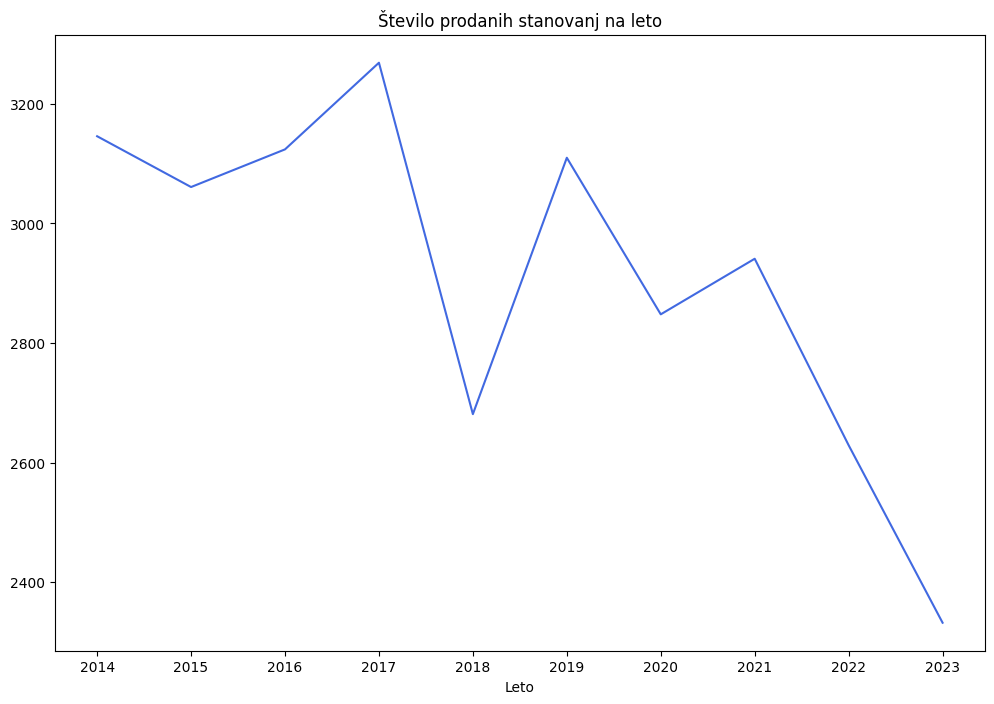

In [6]:
plt.figure(figsize=(12,8))
plt.title("Število prodanih stanovanj na leto") 
plt.xlabel("Leto") 
plt.plot(stevilo_prodaj_po_letih[:, 0], stevilo_prodaj_po_letih[:, 1], color ="royalblue") 
plt.xticks(stevilo_prodaj_po_letih[:, 0])
plt.show()

[3730000, 3100000, 1700000, 3000000, 3160000, 2948000, 5758600, 1619760, 5500000, 7500000]


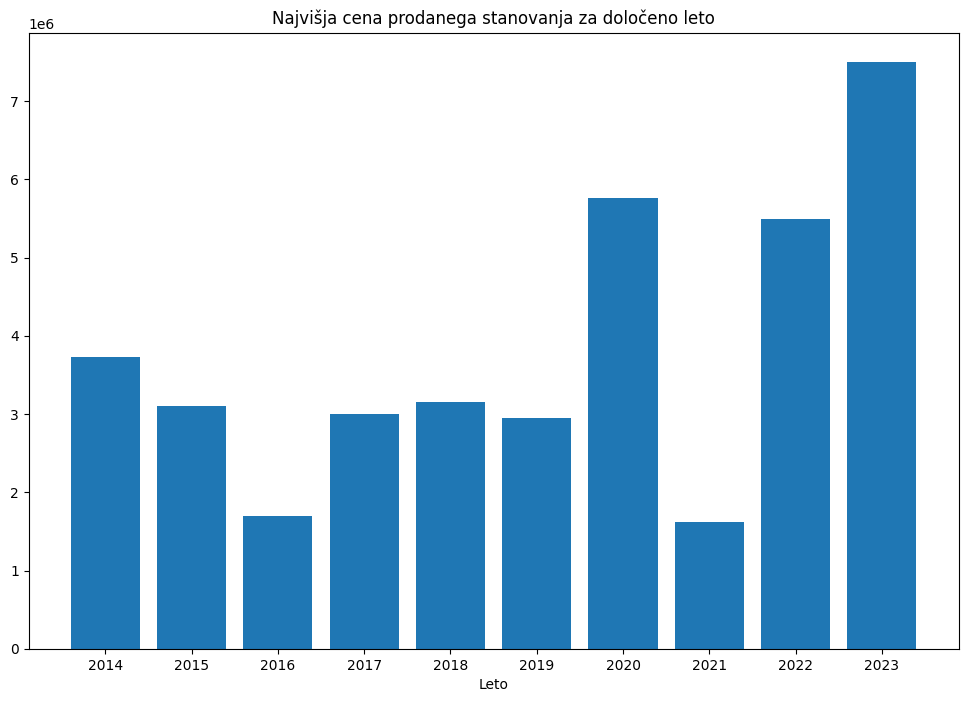

In [7]:
# MAX prodajna cena za vsako leto
x_os = stevilo_prodaj_po_letih[:, 0]

max_cena_za_vsako_leto = []

for leto_analize in podatki_za_leto:
    max_cena_za_vsako_leto.append(np.max(leto_analize[:, 6].astype(int)))

print(max_cena_za_vsako_leto)

plt.figure(figsize=(12,8))
plt.bar(x_os, max_cena_za_vsako_leto)
plt.title("Najvišja cena prodanega stanovanja za določeno leto")
plt.xlabel("Leto")
plt.xticks(x_os)
plt.show()


In [8]:
# Line graph za število prodanih stanovanj za vsak mesec v letu za posamezna leta

# Za vsako leto shranimo število prodanih stanovanj na mesec
mesec_stanovanja_leta = [["2014"], ["2015"], ["2016"],["2017"], ["2018"], ["2019"],["2020"], ["2021"], ["2022"], ["2023"]]
meseci = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

stevec = 0

for leto_analize in podatki_za_leto:
    meseci_slovar = dict()

    # Init: mesec -> seznam z vrsticami za ta mesec
    for i in meseci:
        meseci_slovar[i] = 0
    
    # Število prodanih stanovanj v določenem mesecu
    for row in leto_analize:
        mesec = row[5].split(".")[1]
        meseci_slovar[mesec] += 1

    temp_arr = []

    for stevilo_prodanih_na_mesec in meseci_slovar.values():
        temp_arr.append(stevilo_prodanih_na_mesec)

    temp_arr = np.array(temp_arr)
    mesec_stanovanja_leta[stevec].append(temp_arr)
    stevec += 1


mesec_stanovanja_leta = np.array(mesec_stanovanja_leta, dtype="object")
        
mesec_stanovanja_leta

array([['2014',
        array([193, 192, 237, 260, 231, 275, 299, 225, 335, 298, 352, 249])],
       ['2015',
        array([179, 212, 235, 217, 247, 262, 258, 220, 275, 285, 343, 328])],
       ['2016',
        array([197, 239, 303, 259, 292, 270, 224, 231, 286, 313, 274, 236])],
       ['2017',
        array([281, 242, 319, 256, 296, 315, 292, 204, 231, 278, 284, 271])],
       ['2018',
        array([240, 214, 286, 226, 240, 228, 169, 188, 225, 212, 221, 232])],
       ['2019',
        array([241, 244, 262, 261, 281, 233, 232, 210, 266, 338, 239, 303])],
       ['2020',
        array([254, 244, 195,  87, 150, 260, 241, 201, 304, 279, 343, 290])],
       ['2021',
        array([194, 220, 294, 263, 280, 287, 254, 201, 226, 255, 252, 215])],
       ['2022',
        array([204, 214, 282, 244, 232, 190, 190, 182, 227, 199, 230, 235])],
       ['2023',
        array([183, 164, 257, 176, 218, 231, 155, 146, 165, 257, 216, 164])]],
      dtype=object)

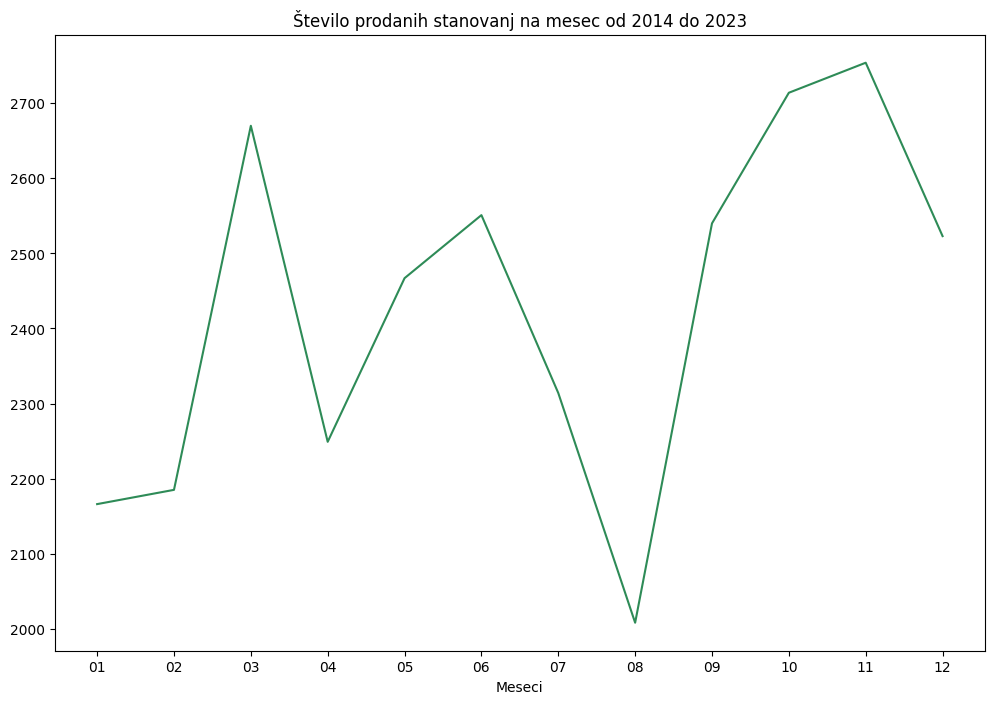

In [9]:
mesecno_stevilo_prodanih_vsa_leta = np.zeros(12)

for letni_podatki in mesec_stanovanja_leta:
    mesecne_vrednosti = letni_podatki[1]
    mesecno_stevilo_prodanih_vsa_leta += mesecne_vrednosti


mesecno_stevilo_prodanih_vsa_leta = mesecno_stevilo_prodanih_vsa_leta.astype(int)

plt.figure(figsize=(12,8))
plt.title("Število prodanih stanovanj na mesec od 2014 do 2023") 
plt.xlabel("Meseci") 
plt.plot(meseci, mesecno_stevilo_prodanih_vsa_leta, color ="seagreen") 
plt.show()

**Iskanje osamelcev**


S pomočjo histogramov bomo probali ugotoviti porazdelitev stanovanj ter iskali osamelce.

In [1]:
from scipy.stats import multivariate_normal as mvn

podMiljon = final2014[final2014[:,6] < 1000000]

mean = np.mean(podMiljon[:,6])
n = len(podMiljon)
sigma2 = (n-1)/n* np.var(podMiljon[:,6])
x_os = np.linspace(10000,1000000,200)
porazdelitvena = [mvn.pdf(x, mean, sigma2) for x in x_os]


plt.figure()
plt.hist(podMiljon[:,6], bins=100, density=True)
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(x_os, porazdelitvena, label="P(X) Cena stanovanj", linewidth=2.0)
plt.xlabel("Cena prodanega stanovanja v letu 2014")
plt.show()

podMiljon = final2023[final2023[:,6] < 1000000]

mean = np.mean(podMiljon[:,6])
n = len(podMiljon)
sigma2 = (n-1)/n* np.var(podMiljon[:,6])
x_os = np.linspace(10000,1000000,200)
porazdelitvena = [mvn.pdf(x, mean, sigma2) for x in x_os]


plt.figure()
plt.hist(podMiljon[:,6], bins=100, density=True)
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(x_os, porazdelitvena, label="P(X) Cena stanovanj", linewidth=2.0)
plt.xlabel("Cena prodanega stanovanja v letu 2023")
plt.show()


NameError: name 'final2014' is not defined

***To Do***
- Model, ki napove ceno stanovanja, glede na zadnji dve leti,
- Povprečna cena glede na tip stanovanja (garsonjera, 1-sobno,...)
- HeatMap cene stanovanj
- Cena stanovanja glede na kvadraturu (ali je premica linearna/logaritmična?)